# Deep Learning-Based Virtual Screening

#### Dr. Mohamed Marzouk Sobaih, Postdoctoral Researcher
#### [Twitter](https://twitter.com/mohamedmarzouk2) | [GitHub](https://github.com/mohamedmarzouk22) | [GoogleScholar](https://scholar.google.com/citations?hl=en&user=OWIaK9sAAAAJ) | [Website](https://mohamedmarzouk22.github.io) | [LinkedIn](http://www.linkedin.com/in/momarzouksobaih/)

## Project Overview
This notebook demonstrates how to build a convolutional neural network (CNN) for bioactivity classification of small molecules using Keras and RDKit.

The objective is to develop a predictive model for **MMP-9 inhibitors** using bioactivity data from the **ChEMBL** database.  

## Pipeline Summary

The overall workflow of this project is illustrated below.

![Pipeline Summary](images/pipeline_summary_virtual_screening.png)

**Figure:** Overview of the virtual screening workflow. Bioactivity data are collected from ChEMBL, converted into molecular fingerprints, used to train a CNN classifier, and finally applied to predict activity of new compounds.

> This workflow will be followed step-by-step in the sections below.

## Table of Content 
<div class="alert alert-block alert-info" style="margin-top: 20px">

<font size = 4> 

1. <a href="#intro"> Introduction to Deep Learning in Virtual Screening and Drug Discovery </a> <br>
    1.1 <a href="#vs_dd"> What Is Virtual Screening?  </a> <br>
    1.2 <a href="#vs_dl"> Virtual Screening and Deep Learning.  </a> <br>
    1.3 <a href="#adv_limitations"> Advantages and Limitations of ML-Driven Virtual Screening.  </a> <br>
    1.4 <a href="#bioactivity"> Bioactivity Classification  </a> <br>
    1.5 <a href="#chembl_db"> The ChEMBL Database  </a> <br>
    1.6 <a href="#molecule_net"> Public Datasets for Molecular ML  </a> <br>
    1.7 <a href="#target_enz"> Target Protein: Matrix Metalloproteinase 9 (MMP-9)  </a> <br>
 
2. <a href="#preparation"> Data Collection and Preparation </a> <br>
    2.1 <a href="#download_chembl"> How to get the data of your target protein from ChEMBL database ?  </a> <br>
    2.2 <a href="#key_features">  What Are the Key Features Available in the ChEMBL Dataset for Characterizing Our Bioactive Molecules?  </a> <br>
    2.3 <a href="#ic50"> What Is IC50, and Why Is It Considered Important in Drug Design?  </a> <br>
    2.4 <a href="#pickup_imp_features"> Identify and Select the Key Features.   </a> <br>
    2.5 <a href="#Preprocessing"> Data Preprocessing  </a> <br>
        - <a href="#exclude_missingdata"> A) Exclude the Instances with Missing Data  </a> <br>
        - <a href="#nM_unit"> B) Select the nM Unit  </a> <br>
        - <a href="#single_representation"> C) Examine Molecule Repetitions and Opt for a Singular Representation </a> <br>
    2.6 <a href="#categorize_label"> Categorize the Molecules and Assign Labels  </a> <br>


3. <a href="#feature_extraction"> Feature Extraction and Engineering </a> <br>
    3.1 <a href="#examine_structures"> Examine Various 2D Structures for Our Molecules.  </a> <br>
    3.2 <a href="#fb"> Molecular Features (Fingerprints) </a> <br>

4. <a href="#train_val_cnn"> Training and Validating CNN Models </a> <br>
    4.1 <a href="#data_split"> Split the Data into Training and Test Datasets. </a> <br>
    4.2 <a href="#define_cnn"> Define Our Convolutional Neural Network (CNN) Model.  </a> <br>
    4.3 <a href="#train_eval"> Train(Fit) & Evaluate the model  </a> <br>
        - <a href="#train"> A) Train (fit) our model  </a> <br>
        - <a href="#model_performance"> B) Model Performance: Accuracy and Loss vs. Epochs for Training and Validation Datasets  </a> <br>
        - <a href="#eval_model"> C) Evaluate our CNN Model  </a> <br>

5. <a href="#assessing_cnn"> Assessing Model Performance </a> <br>
    5.1 <a href="#predictions"> Generate Predictions Using Our Trained Model.  </a> <br>
    5.2 <a href="#visualize_wrong_predictions"> Visualizing Wrong Predictions  </a> <br>
    5.3 <a href="#cm"> Confusion matrix  </a> <br>
    5.4 <a href="#roc_curve"> ROC Curve and AUC  </a> <br>

6. <a href="#conclusion"> Conclusion </a> <br>

<!-- 6. <a href="#applications"> Application of CNN Models for Virtual Screening in Novel Chemical Libraries </a> <br>
    6.1 <a href="#..."> ---  </a> <br>
    6.2 <a href="#..."> ---  </a> <br>
    6.3 <a href="#..."> ---  </a> <br> -->

7. <a href="#resources"> Key Resources </a> <br>

 </font>
    
</div>


<a id='intro'></a>
## 1. Introduction to Deep Learning in Virtual Screening and Drug Discovery
> This section introduces virtual screening, relevant databases, and the role of deep learning in drug discovery.


<a id='vs_dd'></a>
### 1.1 What Is Virtual Screening?

* Virtual screening is a computational technique used in drug discovery to identify potential bioactive compounds from a large library of molecules. The goal is to find those that are most likely to bind to a specific target, usually an enzyme or receptor. In other words, virtual screening is the process of using computer programs to automatically evaluate very large libraries of compounds in order to identify those structures which are most likely to bind to a drug target.

* The bigger the scale and diversity of libraries used, the higher the chance of finding the best drug candidates. Existing libraries can contain over 1 billion compounds.

* The process of virtual screening involves measuring the presence or absence of specific substructures, matching certain calculated molecular properties, and fitting putative ligand molecules into the target receptor site. The ultimate aim is to identify molecules of novel chemical structure that bind to the target. 

* One of the challenges in virtual screening is the high rate of false positives, where compounds are incorrectly identified as active. Therefore, a significant part of the process is to optimize the screening accuracy by minimizing the false positives and maximizing the true positives. True positives are the compounds that are correctly identified as active. The ideal state of screening is that candidates are confirmed to be positive. However, the learned probability may deviate from the ideal state, and the objective of screening is to identify samples with a high probability of a positive outcome.

* There are two main types of virtual screening: 
    * Ligand-based virtual screening (LBVS) :
    relies on similarity to known active molecules.

    * Structure-based virtual screening (SBVS)
    uses the 3D structure of the target protein.

 * Conventional methods for virtual screening, such as docking, typically have a low success rate of less than 0.1%.

<a id='vs_dl'></a>
### 1.2 Virtual Screening and Deep Learning

In recent years, artificial intelligence (AI) has been increasingly used in virtual screening. For instance, deep learning techniques have been applied to improve the accuracy and efficiency of virtual screening. It leverages large amounts of available structural and bioactivity data to predict the potential bioactivity of molecules. There are many applications for the deep learning in the field of drug design, in particular the virtual screening we will list here some of them

A) One of the key applications of deep learning in virtual screening is in the generation of bioactive molecules. For instance, a pharmacophore-guided deep learning approach has been proposed to generate diverse active-like molecules with limited activity data.This approach uses pharmacophore hypotheses as a bridge to connect different types of activity data, providing a flexible strategy for generating bioactive molecules.

B) Deep learning has also been used to accelerate structure-based virtual screening. A technique called Deep Docking (DD) has been developed that iteratively trains deep neural networks with small batches of explicitly docked molecules, enabling the screening of billion-sized molecular libraries.



<a id='adv_limitations'></a>
### 1.3 Advantages and Limitations of ML-Driven Virtual Screening.

A) **The Advantages** : 
* ML/AI-driven virtual screening offers several advantages over conventional methods:

    * Speed and efficiency: It is much faster than conventional methods and can handle much larger libraries of compounds.
    * Cost savings: It can save time and money by reducing the need for expensive laboratory experiments.
    
    * Enhanced accuracy: It can be more accurate than conventional methods at identifying promising drug candidates.
    * Reduced human bias: It can help to reduce the risk of human bias in the drug discovery process.
    
* Overall, ML/AI-driven virtual screening is a powerful tool that can help to accelerate the drug discovery process and bring new drugs to market more quickly and cheaply.

B) **The limitations** : 

* The limitations of machine learning (ML)-driven virtual screening for drug discovery : 
    * Need for expertise: Incorrect implementation or misinterpretation of results can lead to flawed conclusions. 

    * Prone to biased data and generalization: ML models can be biased if they are trained on data that is not representative of the real world. This can lead to inaccurate predictions when the model is applied to new data.
    
    * Model interpretability: Many ML models are "black boxes," meaning that it is difficult to understand how they arrive at their predictions. This can make it difficult to trust the results of the model and to identify potential errors.
    
    * Data quality and quantity: The quality and quantity of data used to train an ML model is essential for its success. Poor-quality data or insufficient data can lead to inaccurate predictions.
    
 * However, it is important to note that ML is still a powerful tool that can be used to improve the drug discovery process. When used correctly, ML can help to identify promising drug candidates more quickly and efficiently than traditional methods.



<a id='bioactivity'></a>
### 1.4 Bioactivity Classification


* Bioactivity classification :  is essentially categorizing molecules based on their biological activities. This classification can be done at different levels of detail, depending on the needs of the specific research project. Some common examples of bioactivity classifications include:

    * Target-based: Molecules are classified based on their ability to bind to specific biological targets, such as enzymes or receptors.

    * Function-based: Molecules are classified based on their overall effect on a biological system, such as their ability to kill cancer cells or reduce inflammation.
    
    * Disease-based: Molecules are classified based on their potential to treat or prevent specific diseases.
    
* By understanding the bioactivity of a molecule, researchers can then make informed decisions about whether or not it is a promising candidate for further development as a drug.

<a id='chembl_db'></a>
### 1.5 The ChEMBL Database

* ChEMBL is an open-source database, widely used in virtual screening and drug discovery, containing a wealth of information about biologically active molecules and their interactions with protein targets. 
Here's a breakdown of what ChEMBL offers:
    * Large and diverse: ChEMBL currently houses over 2.5 million curated bioactivities for more than 1.4 million unique compounds. This covers a wide range of targets, including enzymes, receptors, ion channels, and more.
    * Detailed: For each bioactivity record, ChEMBL provides various data points, including:
    Molecular structure: 2D and 3D representations of the compound.
    * Activity data: IC50, Ki, EC50, or other measurement of binding affinity or potency.
    * Target information: Protein name, UniProt ID, sequence, and functional details.
    * Assay data: Experimental conditions, assay type, and relevant references.
    Regularly updated: ChEMBL team updates the database frequently with new data from published literature and public databases.
    Benefits for virtual screening with deep learning:

    * High-quality training data: The large and diverse dataset of bioactivities in ChEMBL is invaluable for training deep learning models to predict the activity of new molecules.

* Limitations:
    * Incomplete data: While extensive, ChEMBL may not encompass all known bioactivities. Some niche areas or unpublished data might be missing.
    * Data quality variations: Some data points in ChEMBL might have higher variance or uncertainty than others, requiring careful consideration during model training.
 
 * Overall, ChEMBL is a powerful resource for virtual screening by deep learning, offering high-quality, diverse, and accessible data for training and validating predictive models. However, it's crucial to be aware of potential limitations and incorporate additional data sources and quality control measures for robust virtual screening applications.

<a id='molecule_net'></a>
### 1.6 Public Datasets for Molecular ML
> Short answer : MoleculeNet

* MoleculeNet is a benchmark specifically designed for testing machine learning methods of molecular properties. It curates multiple public datasets, establishes metrics for evaluation, and offers high-quality open-source implementations of multiple previously proposed molecular machine learning methods.
* MoleculeNet is built upon multiple public databases and currently includes over 700,000 compounds tested on a range of different tasks. All MoleculeNet datasets are split into training, validation, and test subsets following an 80/10/10 ratio.
* One of the most important parts of machine learning applications is finding a suitable dataset. The MoleculeNet suite has curated a whole range of datasets and loaded them into DeepChem dc.data.Dataset objects for convenience.


<a id='target_enz'></a>
### 1.7 Target Protein: Matrix Metalloproteinase 9 (MMP-9)



* Our target enzyme is matrix metalloproteinase 9 (MMP-9), which is a fascinating enzyme with significant implications in numerous biological processes, including: tissue remodeling, immune response, and it is also highly expressed in many cancers, where it contributes to tumor growth, invasion, and metastasis. 

* Due to its involvement in various diseases, MMP-9 has emerged as a promising therapeutic target. Researchers are developing inhibitors and other strategies to regulate MMP-9 activity. 

* The MMP-9 small-molecule inhibitors are drugs directly bind to the active site of MMP-9, preventing it from breaking down ECM components. Some MMP-9 inhibitors are already in clinical trials for cancer and other diseases.

<a id='preparation'></a>
## 2. Data Collection and Preparation
> We will collect bioactive data for our target protein from the ChEMBL database and preprocess it for constructing our Convolutional Neural Network (CNN) model.

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

<a id='download_chembl'></a>
### 2.1 How to get the data of your target protein from ChEMBL database ? 

Open the [ChEMBL website](https://www.ebi.ac.uk/chembl/) and enter the target protein name in the search bar, for example, 'MMP-9.' Upon search, you will encounter a list of available targets with that name. We will carefully select the specific target that aligns with our requirements. 

<div style="text-align:center">
    <img src="images/chembl_mmp9.png" alt="chembl_mmp9" />
    <p style="font-style: normal; margin-top:10px;"> Search for target on ChEMBL </p>
</div>

You can access this target to view detailed information about it through what is referred to as the 'Target Report Card.' This report provides comprehensive data about the selected target such as : 

- A) Activity Charts 

<div style="text-align:center">
    <img src="images/drugactivity.png" alt="activity" />
    <p style="font-style: normal; margin-top:10px;"> Activity Charts for the ligands </p>
</div>


- B) Ligand Efficiencies

<div style="text-align:center">
    <img src="images/ligand_effieciency.png" alt="activity" />
    <p style="font-style: normal; margin-top:10px;"> Ligand efficiencies </p>
</div>

- Lastly, you can select all compounds and download the CSV file for them, as illustrated in this figure. 

<div style="text-align:center">
    <img src="images/select_all_bioactivemolecules.png" alt="selection" />
    <p style="font-style: normal; margin-top:10px;"> Select and Download the CSV file </p>
</div>

> Let's read the CSV file downloaded from the ChEMBL database 

In [4]:
mmp9_dataset=pd.read_csv("mmp9.csv", sep=";")

In [5]:
mmp9_dataset.head()

,Molecule ChEMBL ID,Molecule Name,Molecule Max Phase,Molecular Weight,#RO5 Violations,AlogP,Compound Key,Smiles,Standard Type,Standard Relation,...,Target Organism,Target Type,Document ChEMBL ID,Source ID,Source Description,Document Journal,Document Year,Cell ChEMBL ID,Properties,Action Type
0,CHEMBL398350,NaN,NaN,421.52,0.0,2.43,(R)-8b,Cc1ccc(Oc2ccc(N(C[C@@H](NC(C)C)C(=O)NO)S(C)(=O...,IC50,'=',...,Homo sapiens,SINGLE PROTEIN,CHEMBL1140820,1,Scientific Literature,Bioorg Med Chem Lett,2008.0,NaN,NaN,NaN
1,CHEMBL332120,NaN,NaN,409.42,0.0,1.69,"table 14, 28",COc1ccc(S(=O)(=O)N(Cc2ccc([N+](=O)[O-])cc2)C(C...,Ki,'=',...,Homo sapiens,SINGLE PROTEIN,CHEMBL1140610,1,Scientific Literature,Bioorg Med Chem,2007.0,NaN,NaN,NaN
2,CHEMBL306726,NaN,NaN,469.34,0.0,2.38,"table 14, 24",CC(C(=O)NO)N(Cc1ccccc1[N+](=O)[O-])S(=O)(=O)c1...,Ki,'=',...,Homo sapiens,SINGLE PROTEIN,CHEMBL1140610,1,Scientific Literature,Bioorg Med Chem,2007.0,NaN,NaN,NaN
3,CHEMBL340461,NaN,NaN,466.43,0.0,3.49,"table 14, 15",CC(C)CC(C(=O)NO)N(Cc1ccccc1)S(=O)(=O)c1c(F)c(F...,Ki,'=',...,Homo sapiens,SINGLE PROTEIN,CHEMBL1140610,1,Scientific Literature,Bioorg Med Chem,2007.0,NaN,NaN,NaN
4,CHEMBL120049,NaN,NaN,376.30,0.0,1.58,"table 14,13",CC(C)CC(NS(=O)(=O)c1c(F)c(F)c(F)c(F)c1F)C(=O)NO,Ki,'=',...,Homo sapiens,SINGLE PROTEIN,CHEMBL1140610,1,Scientific Literature,Bioorg Med Chem,2007.0,NaN,NaN,NaN


> Let's examine the information available in our dataset CSV file obtained from the ChEMBL database. 
- Afterward, we can determine which data to incorporate into our model for building.

In [6]:
mmp9_dataset.columns

Index(['Molecule ChEMBL ID', 'Molecule Name', 'Molecule Max Phase',
       'Molecular Weight', '#RO5 Violations', 'AlogP', 'Compound Key',
       'Smiles', 'Standard Type', 'Standard Relation', 'Standard Value',
       'Standard Units', 'pChEMBL Value', 'Data Validity Comment', 'Comment',
       'Uo Units', 'Ligand Efficiency BEI', 'Ligand Efficiency LE',
       'Ligand Efficiency LLE', 'Ligand Efficiency SEI', 'Potential Duplicate',
       'Assay ChEMBL ID', 'Assay Description', 'Assay Type', 'BAO Format ID',
       'BAO Label', 'Assay Organism', 'Assay Tissue ChEMBL ID',
       'Assay Tissue Name', 'Assay Cell Type', 'Assay Subcellular Fraction',
       'Assay Parameters', 'Assay Variant Accession', 'Assay Variant Mutation',
       'Target ChEMBL ID', 'Target Name', 'Target Organism', 'Target Type',
       'Document ChEMBL ID', 'Source ID', 'Source Description',
       'Document Journal', 'Document Year', 'Cell ChEMBL ID', 'Properties',
       'Action Type'],
      dtype='object')

<a id='key_features'></a>
### 2.2 What Are the Key Features Available in the ChEMBL Dataset for Characterizing Our Bioactive Molecules?

There are many features that you can found in the ChEMBL dataset as you we have just seen, and the most important of them which we will relay on them in this tutorial to build our model are: 

* ChEMBL ID: A unique identifier assigned to each compound or bioactive molecule in the ChEMBL database. 
* Smiles (Simplified Molecular Input Line Entry System):
A text representation of the chemical structure of a molecule. 
* Standard Type: Refers to the type of assay or experiment used to measure the bioactivity of the compound. It could include terms like IC50 (half-maximal inhibitory concentration), EC50 (half-maximal effective concentration), etc.
* Standard Value: The actual numerical result of the bioactivity assay, typically representing the concentration or dose at which the compound exhibits its biological activity. 
* Standard Units: The units in which the Standard Value is expressed. It could be nanomolar (nM), micromolar (uM), or picomolar (pM).

<a id='ic50'></a>
### 2.3 What Is IC50, and Why Is It Considered Important in Drug Design?

* The IC50, or half-maximal inhibitory concentration, is a common pharmacological measure used in biochemistry and pharmacology to assess the potency of a substance (usually a drug or compound) in inhibiting a specific biological or biochemical function. Here are more details about IC50:

    * Definition: The IC50 is the concentration of a substance required to inhibit a biological or biochemical process by 50%. In other words, it represents the concentration of a compound at which the observed effect is reduced by half.
    * Measurement: IC50 values are typically determined through dose-response experiments. Different concentrations of a compound are tested, and the response of the biological system is measured. The IC50 is then calculated by plotting the concentration-response curve and determining the concentration at which the response is halfway between the baseline (no inhibition) and the maximum inhibition.
    * Units: IC50 values are expressed in concentration units (e.g., nanomolar, micromolar) and represent the amount of the compound needed to achieve the 50% inhibitory effect.

    * Use in Drug Development: IC50 values are widely used in drug discovery and development to assess the potency of a potential drug candidate. Lower IC50 values indicate higher potency, as lower concentrations are needed to achieve the desired biological effect.

    * Specificity: The IC50 is specific to the biological or biochemical process being studied. For example, in the context of drug discovery, it might refer to the concentration required to inhibit the activity of a specific enzyme or block a particular receptor.

    * Relation to Affinity: A lower IC50 often indicates higher affinity, but the relationship is not always linear, as factors such as drug metabolism and bioavailability also play a role.
    Dose-Response Curve: This curve represents the relationship between the concentration of the compound and the biological response.
    
    * Limitations: While IC50 is a valuable measure of potency, it doesn't provide information about the drug's efficacy, safety, or other pharmacokinetic properties. It is often used in conjunction with other measures to comprehensively assess a compound's suitability as a drug candidate.

<a id='pickup_imp_features'></a>
### 2.4 Identify and Select the Key Features.

We select the following features for model construction:
- ChEMBL ID  
- SMILES representation  
- Standard Type  
- Standard Value  
- Standard Units

In [7]:
imp_features =mmp9_dataset[['Molecule ChEMBL ID', 'Smiles', 'Standard Type', 'Standard Value',
       'Standard Units' ]]

In [8]:
imp_features.head()

,Molecule ChEMBL ID,Smiles,Standard Type,Standard Value,Standard Units
0,CHEMBL398350,Cc1ccc(Oc2ccc(N(C[C@@H](NC(C)C)C(=O)NO)S(C)(=O...,IC50,31.000,nM
1,CHEMBL332120,COc1ccc(S(=O)(=O)N(Cc2ccc([N+](=O)[O-])cc2)C(C...,Ki,28.180,nM
2,CHEMBL306726,CC(C(=O)NO)N(Cc1ccccc1[N+](=O)[O-])S(=O)(=O)c1...,Ki,1.000,nM
3,CHEMBL340461,CC(C)CC(C(=O)NO)N(Cc1ccccc1)S(=O)(=O)c1c(F)c(F...,Ki,1.096,nM
4,CHEMBL120049,CC(C)CC(NS(=O)(=O)c1c(F)c(F)c(F)c(F)c1F)C(=O)NO,Ki,123.030,nM


<a id='Preprocessing'></a>
### 2.5 Data Preprocessing

* We need to implement several preprocessing steps for our features. 
    * **A) Missing Data :** in cases where there is missing data, it is imperative to exclude the corresponding compounds from our dataset. This ensures that our CNN model is trained on a robust set of high-quality training data. 
    * **B) Standard unit :** for the 'standard unit' feature, our focus is solely on values expressed in nanometers (nM). Therefore, we will filter and retain only those data points with 'nM' as the standard unit. 
    * **C} Singular Molecular representation :** to address potential repetitions of the same bioactive molecule arising from different experiments, we must select a singular representation from these repetitions. This step is crucial for maintaining data integrity and avoiding redundancy in our dataset.

<a id='exclude_missingdata'></a>
#### A) Exclude the Instances with Missing Data

In [9]:
print("The shape of the features before dropping the missing data : ", imp_features.shape)
imp_features =  imp_features.dropna()
# x1=x1.dropna()
print("The shape of the features after dropping the missing data : ", imp_features.shape)

The shape of the features before dropping the missing data :  (6668, 5)
The shape of the features after dropping the missing data :  (4407, 5)


> Our Observation : 
* The count of bioactive molecules decreased from 6668 to 4407, indicating that approximately 2261 bioactive molecules have at least one missing data point in the essential features under consideration. Given that such molecules may potentially mislead our model, it is advisable to exclude them.

> Interpretation : 
* Removing incomplete entries reduces noise and ensures that the model is trained on consistent and reliable measurements.  
Although this reduces dataset size, it generally improves model stability.

<a id='nM_unit'></a>
#### B) Select the nM Unit. 
Let's pick up only the bioactive molecules with standard unit is nM only 

In [10]:
imp_features_nm = imp_features[imp_features["Standard Units"].str.contains("nM")]
print("The shape of the features after select the nM unit only : ", imp_features_nm.shape)

The shape of the features after select the nM unit only :  (3962, 5)


> Our Observation : 
* There are 445 bioactive molecules with a standard unit other than nM. It is advisable to utilize training data comprising molecules with consistent units to facilitate ease of comparison, with the only variation being in their respective activities.

In [11]:
imp_features_nm["Standard Units"].value_counts()

Standard Units
nM    3962
Name: count, dtype: int64

<a id='single_representation'></a>
#### C) Examine Molecule Repetitions and Opt for a Singular Representation

In [12]:
imp_features["Molecule ChEMBL ID"].value_counts()

Molecule ChEMBL ID
CHEMBL514138     30
CHEMBL19611      16
CHEMBL279785     13
CHEMBL70176       9
CHEMBL483857      8
                 ..
CHEMBL2063272     1
CHEMBL2063275     1
CHEMBL3675556     1
CHEMBL3675549     1
CHEMBL178590      1
Name: count, Length: 3742, dtype: int64

> Let's pick one representation and check if it's repeated with the same structure. 
- Aim : We want to make sure there's no need for different duplicates.

In [13]:
example = imp_features_nm[imp_features_nm["Molecule ChEMBL ID"].str.contains("CHEMBL514138")]
example 

,Molecule ChEMBL ID,Smiles,Standard Type,Standard Value,Standard Units
45,CHEMBL514138,COc1ccc(S(=O)(=O)N(Cc2cccnc2)[C@@H](C(=O)NO)C(...,IC50,4.3,nM
47,CHEMBL514138,COc1ccc(S(=O)(=O)N(Cc2cccnc2)[C@@H](C(=O)NO)C(...,IC50,4.8,nM
481,CHEMBL514138,COc1ccc(S(=O)(=O)N(Cc2cccnc2)[C@@H](C(=O)NO)C(...,IC50,9.0,nM
681,CHEMBL514138,COc1ccc(S(=O)(=O)N(Cc2cccnc2)[C@@H](C(=O)NO)C(...,IC50,4.3,nM
795,CHEMBL514138,COc1ccc(S(=O)(=O)N(Cc2cccnc2)[C@@H](C(=O)NO)C(...,IC50,10.0,nM
874,CHEMBL514138,COc1ccc(S(=O)(=O)N(Cc2cccnc2)[C@@H](C(=O)NO)C(...,Ki,8.0,nM
1176,CHEMBL514138,COc1ccc(S(=O)(=O)N(Cc2cccnc2)[C@@H](C(=O)NO)C(...,IC50,8.0,nM
1337,CHEMBL514138,COc1ccc(S(=O)(=O)N(Cc2cccnc2)[C@@H](C(=O)NO)C(...,IC50,4.3,nM
1478,CHEMBL514138,COc1ccc(S(=O)(=O)N(Cc2cccnc2)[C@@H](C(=O)NO)C(...,IC50,5.0,nM
2110,CHEMBL514138,COc1ccc(S(=O)(=O)N(Cc2cccnc2)[C@@H](C(=O)NO)C(...,Ki,8.0,nM


## Add note about the first one in the doublication 

> Multiple activity measurements may exist for the same molecule due to different experiments.  
* To avoid biasing the model, we retain a single representative entry per molecule, selecting the lowest activity value after sorting.

**Note (Example of repeated measurements):**

Some molecules appear multiple times in ChEMBL because their activity was measured in different studies, assay conditions, or laboratories.  
For example, the compound **CHEMBL514138 (CGS-27023A)** has several reported IC50/Ki values. This compound has reached **preclinical development**, which explains why multiple independent measurements exist.

To avoid biasing the model toward molecules with more experimental entries, we retain a single representative value per molecule (the lowest activity value after sorting).

![CHEMBL514138 example](images/CHEMBL514138.png)

**Figure:** Example of a molecule with multiple reported activity measurements (CHEMBL514138). Preclinical compounds often have repeated assays across different studies.

In [14]:
imp_features_nm = imp_features_nm.sort_values("Standard Value", ascending = True)

In [15]:
imp_features_nm_unique =  imp_features_nm.drop_duplicates("Molecule ChEMBL ID", keep='first')
print("The shape of the features after select one structure for each bioactive molecule: ", imp_features_nm_unique.shape)

The shape of the features after select one structure for each bioactive molecule:  (3484, 5)


<a id='categorize_label'></a>
### 2.6 Categorize the Molecules and Assign Labels

* Let's categorize the unique bioactive molecules into active and inactive based on the following criteria:
    * If the standard value is less than or equal to 1000 nM, the bioactive molecule will be considered strong, and the label will be set to 1.
    * If the standard value is greater than 5000 nM, the bioactive molecule will be considered weak, and the label will be set to 0. 

In [16]:
strong = imp_features_nm_unique.loc[imp_features_nm_unique["Standard Value"]<= 1000 ]
weak = imp_features_nm_unique.loc[imp_features_nm_unique["Standard Value"]> 5000 ]

In [17]:
weak.head()

,Molecule ChEMBL ID,Smiles,Standard Type,Standard Value,Standard Units
2852,CHEMBL1916055,O=C(N[C@@H]1CC=CCN(O)C1=O)c1ccc(Oc2ccc(Cl)cc2)cc1,IC50,5091.0,nM
5966,CHEMBL4435530,O=C(CCCNCc1ccc(O)c2ncccc12)Nc1ccccc1,IC50,5100.0,nM
6381,CHEMBL4167291,CC(C)CNC(=O)CC[C@H](NS(=O)(=O)c1ccc([N+](=O)[O...,IC50,5140.0,nM
3654,CHEMBL236974,CC(C)[C@H](C(=O)NO)N(Cc1cccnc1)S(=O)(=O)c1ccc(...,IC50,5150.0,nM
3932,CHEMBL820,CS(=O)(=O)OCCCCOS(C)(=O)=O,IC50,5215.0,nM


> Let's Assign the Labels.

In [18]:
strong= strong.assign(Label=1)
weak= weak.assign(Label=0)

> Let's Combine Both Strong and Weak Instances into a Single DataFrame.

In [19]:
strong_week_combined = pd.concat([strong, weak],axis=0)

In [20]:
strong_week_combined.tail()

,Molecule ChEMBL ID,Smiles,Standard Type,Standard Value,Standard Units,Label
1743,CHEMBL345135,O=C(NO)[C@H](Cc1ccccc1)NS(=O)(=O)c1ccccc1,IC50,1000000.0,nM,0
1158,CHEMBL4633785,O=C(O)c1c(F)ccc2c1OB(O)[C@@H]1C[C@H]21,IC50,1000000.0,nM,0
3517,CHEMBL184029,C=C[C@@H]1OC(CCCCC)=N[C@H]1CO,Ki,2000000.0,nM,0
3518,CHEMBL360435,C=C[C@@H]1OC(CCCCCCC)=N[C@H]1CO,Ki,2000000.0,nM,0
5886,CHEMBL360509,C=C[C@@H]1OC(c2ccccc2)=N[C@H]1CO,Ki,4000000.0,nM,0


> Save the data in files 
* one for the entire DF 
* another for the smiles and label only 

In [22]:
from datetime import datetime

today = datetime.today().strftime("%Y-%m-%d")
filename = f"mmp9-labelled_{today}.csv"

strong_week_combined.to_csv(filename, index=None)

In [23]:
strong_week_combined[["Smiles","Label"]].to_csv("mmp9-labelled-smiles.smi", index=None, header=False)

<a id='feature_extraction'></a>
## 3. Feature Extraction and Engineering

We will extract features from our data, such as fingerprints, using the RDKit Python library.

### Workflow
- Data --> Features --> training/evaluation --> Production (VS) 
1. Prepare molecular structures  
2. Generate fingerprints  
3. Train and evaluate the model  
4. Apply the model in virtual screening

In [24]:
import os 
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
from rdkit import rdBase
import seaborn as sns
import matplotlib.pyplot as plt

<a id='examine_structures'></a>
### 3.1 Examine Various 2D Structures for Our Molecules.

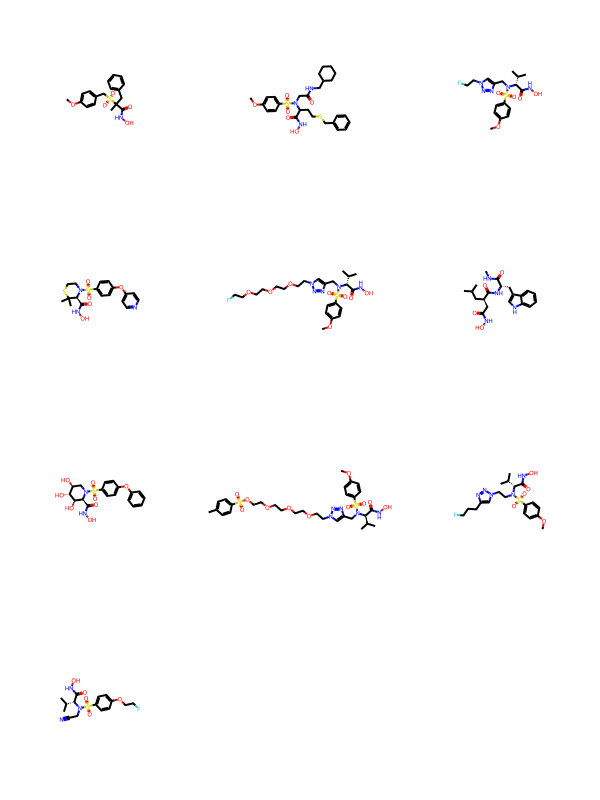

In [25]:
Draw.MolsToGridImage([Chem.MolFromSmiles(smi) for smi in strong_week_combined["Smiles"].iloc[0:10]])

<a id='fb'></a>
### 3.2 Molecular Features (Fingerprints)
> In this section, we will employ Morgan Fingerprints.

In [26]:
all_smiles= Chem.SmilesMolSupplier("mmp9-labelled-smiles.smi", delimiter=",", titleLine=False)

In [27]:
fingerprint = [AllChem.GetMorganFingerprintAsBitVect(mol, 2, nBits=2048) for mol in all_smiles if mol is not None]

> Note 
* Each molecule is represented by a 2048-bit Morgan fingerprint.  
These binary vectors encode the presence of structural fragments and serve as numerical input to the neural network.

In [28]:
# if you just want how the fingerprint saved in the memory
#  fingerprint

> Let's Convert the Fingerprint to an Array for Convenient Handling in Subsequent Steps Using scikit-learn to Build Our Model.

In [29]:
fingerprint_array = np.asarray(fingerprint, dtype=np.int32)
fingerprint_array

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 1, 1, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int32)

In [30]:
fingerprint_array.shape

(2874, 2048)

> Note: All the data items available for training and testing our model consist of 2874 molecules.

> Let's Obtain the Labels in an Array with the Same Format.

In [31]:
ids = [mol.GetProp("_Name") for mol in all_smiles if mol is not None]

In [32]:
labels = np.asarray(ids, dtype=np.int32).reshape(-1,1)
labels

array([[1],
       [1],
       [1],
       ...,
       [0],
       [0],
       [0]], dtype=int32)

> Let's Concatenate Both the Fingerprint and Labels Together and Save the Resulting Dataset.

In [33]:
dataset = np.concatenate([fingerprint_array,labels], axis =1)
dataset

array([[0, 0, 0, ..., 0, 0, 1],
       [0, 1, 1, ..., 0, 0, 1],
       [0, 1, 0, ..., 0, 0, 1],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int32)

In [34]:
np.save("mmp9-fp-dataset", dataset)


<a id='train_val_cnn'></a>
## 4. Build and validating our CNN Models

In [35]:
from sklearn.model_selection import train_test_split 
from keras.models import Sequential 
from keras.layers import Dense, Conv1D, Flatten, MaxPooling1D 
from keras.optimizers import Adam 
from keras import backend as K 


<a id='data_split'></a>
### 4.1 Split the Data into Training and Test Datasets.

In [36]:
X_train, X_test, y_train,y_test=train_test_split(fingerprint_array, labels, test_size=0.2, shuffle=True, random_state=421) 

<a id='define_cnn'></a>
### 4.2 Define Our Convolutional Neural Network (CNN) Model.

In [37]:
model=Sequential() 

# Add model layers 

model.add(Conv1D(64, kernel_size=16, activation="relu", input_shape=(X_train.shape[1],1))) 
model.add(Conv1D(32, kernel_size=16, activation="relu"))
model.add(Flatten()) 
model.add(Dense(1, activation="sigmoid")) 

#compile model 
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"]) 

<a id='train_eval'></a>
### 4.3 Train(Fit) & Evaluate the model 

<a id='train'></a>
#### A) Train (fit) our model 


In [38]:
history = model.fit(X_train, y_train, epochs=20, validation_split=0.1) 

Epoch 1/20
65/65 [==============================] - 4s 56ms/step - loss: 0.3968 - accuracy: 0.8105 - val_loss: 0.3453 - val_accuracy: 0.8609
Epoch 2/20
65/65 [==============================] - 4s 56ms/step - loss: 0.2238 - accuracy: 0.9149 - val_loss: 0.3513 - val_accuracy: 0.8652
Epoch 3/20
65/65 [==============================] - 4s 56ms/step - loss: 0.1640 - accuracy: 0.9415 - val_loss: 0.2843 - val_accuracy: 0.8870
Epoch 4/20
65/65 [==============================] - 4s 54ms/step - loss: 0.1322 - accuracy: 0.9502 - val_loss: 0.3415 - val_accuracy: 0.8783
Epoch 5/20
65/65 [==============================] - 4s 55ms/step - loss: 0.1121 - accuracy: 0.9613 - val_loss: 0.3297 - val_accuracy: 0.8957
Epoch 6/20
65/65 [==============================] - 4s 57ms/step - loss: 0.0950 - accuracy: 0.9647 - val_loss: 0.3775 - val_accuracy: 0.8870
Epoch 7/20
65/65 [==============================] - 4s 63ms/step - loss: 0.0835 - accuracy: 0.9696 - val_loss: 0.3932 - val_accuracy: 0.8652
Epoch 8/20
65

<a id='model_performance'></a>
#### B) Model Performance: Accuracy and Loss vs. Epochs for Training and Validation Datasets

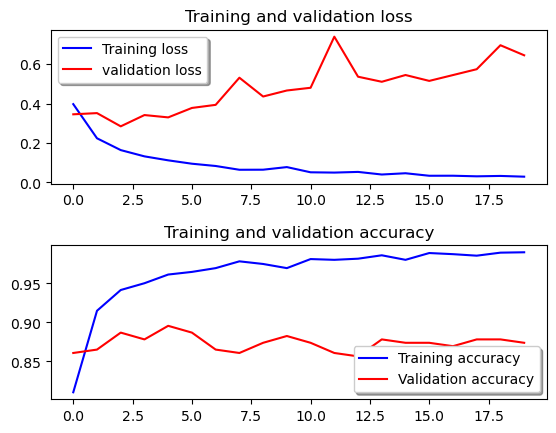

In [39]:
# Plot the loss and accuracy curves for training and validation 
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)
ax[0].set_title('Training and validation loss')


ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)
ax[1].set_title('Training and validation accuracy')

plt.subplots_adjust(hspace=0.4)  # Adjust the vertical space between subplots as needed

<a id='eval_model'></a>
#### C) Evaluate our CNN Model

In [40]:
training_loss, training_acc = model.evaluate(X_train, y_train, verbose=0)
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print('The accuracy of our model on Training dataset : %.2f' % (training_acc*100))
print('The loss of our model on Training dataset : %.2f' % (training_loss*100))
print('The accuracy of our model on Test dataset : %.2f' % (test_acc*100))
print('The loss of our model on Test dataset : %.2f' % (test_loss*100))

The accuracy of our model on Training dataset : 98.26
The loss of our model on Training dataset : 7.94
The accuracy of our model on Test dataset : 90.61
The loss of our model on Test dataset : 39.01


**Training behavior**

- Training accuracy increases steadily to ~99%.
- Validation accuracy stabilizes around ~87–89%.
- Validation loss increases after several epochs.

This divergence indicates that the model begins to memorize the training data rather than learning general patterns.

### Overfitting Analysis

Overfitting occurs when a model learns patterns specific to the training data but fails to generalize to unseen samples.

Evidence of overfitting in this model:
- Training accuracy ≈ 99%
- Test accuracy ≈ 90%
- Validation loss increases while training loss decreases

This behavior suggests that the model begins to memorize training examples rather than learning generalizable structure–activity relationships.

### Possible Improvements (Future Work)

- **Dropout layers**  
  Randomly disabling neurons during training reduces reliance on specific features and improves generalization.

- **L2 regularization**  
  Penalizing large weights encourages simpler models and reduces the tendency to fit noise.

- **Early stopping**  
  Monitoring validation loss and stopping training when it begins to increase prevents unnecessary over-training.

- **Hyperparameter tuning**  
  Adjusting learning rate, number of filters, kernel size, and batch size can improve generalization and stability.

- **Increasing dataset size or data augmentation**  
  Larger and more diverse training data improves model robustness.  
  In molecular datasets, augmentation may include scaffold diversity, alternative descriptors, or additional public datasets.

<a id='assessing_cnn'></a>
## 5. Assessing Model Performance

In [ ]:
import warnings
warnings.filterwarnings("ignore")

<a id='predictions'></a>
### 5.1 Generate Predictions Using Our Trained Model.

In [ ]:
#get the predictions for the test data
predicted = model.predict(X_test)
# Look how the predicted values out 
# predicted

> Convert the Predicted Values to Binary Format (One and Zero).

In [ ]:
predicted = (model.predict(X_test)>0.5).astype("int32")
# Look how the predicted values become
# predicted

> Identify correct and incorrect predictions

In [ ]:
correct = np.nonzero(predicted == y_test)[0]
incorrect = np.nonzero(predicted != y_test)[0]

print("Correct predictions:", len(correct))
print("Incorrect predictions:", len(incorrect))

**Interpretation**

Out of all test samples, 519 were correctly classified and 56 were misclassified, corresponding to an accuracy of approximately 90%.  
The remaining misclassified molecules will be examined to better understand the model limitations.

> Quick sanity check (important)

In [ ]:
for i in range(10):
    print(f"True: {y_test[i][0]}  |  Predicted: {predicted[i][0]}")

**Interpretation**

A quick comparison of predicted and true labels confirms that the prediction pipeline is functioning correctly.  
Most predictions match the ground truth, with occasional mismatches that are expected given the model accuracy.

<a id='visualize_wrong_predictions'></a>
### 5.2 Visualizing Wrong Predictions

Inspecting incorrectly classified molecules helps identify systematic errors, such as:
- Structural motifs the model fails to recognize
- Label noise
- Dataset imbalance

#### 1) Split with SMILES
* During training, the model uses numerical fingerprints rather than molecular structures.
* To visualize molecules later, we must keep track of the corresponding SMILES strings when splitting the dataset into training and test sets.

In [ ]:
smiles = strong_week_combined["Smiles"].values

X_train, X_test, y_train, y_test, smiles_train, smiles_test = train_test_split(
    fingerprint_array, labels, smiles,
    test_size=0.2, shuffle=True, random_state=421
)

> By splitting the SMILES alongside the fingerprints and labels, we ensure that each prediction can be mapped back to its original molecule correctly.

#### 2) Visualize Misclassified Molecules (Correct Mapping)
* After generating predictions, we identify the indices of misclassified samples in the test set.
* Using these indices, we retrieve the corresponding SMILES strings and convert them to molecular structures using RDKit.

In [ ]:
incorrect = np.nonzero(predicted != y_test)[0]
wrong_idx = incorrect[:12]

wrong_mols = [Chem.MolFromSmiles(smiles_test[i]) for i in wrong_idx]
legends = [f"True={y_test[i][0]}, Pred={predicted[i][0]}" for i in wrong_idx]

Draw.MolsToGridImage(wrong_mols, molsPerRow=4, subImgSize=(250,250), legends=legends)

**Figure:** Examples of misclassified molecules from the test set.  
These errors may arise from borderline activity values near classification thresholds, assay variability, or chemical scaffolds underrepresented in the training data.

**Interpretation**

Most misclassified cases correspond to molecules predicted as active (Pred=1) while labeled inactive (True=0).  
This suggests that the model may be sensitive to certain structural motifs that appear in active compounds but are also present in some inactive molecules.

Some errors may also arise from:
- borderline activity values near the classification thresholds,
- variability between experimental assays,
- limited representation of certain chemical scaffolds in the training data.

Visual inspection of misclassified molecules provides qualitative insight into model behavior that cannot be obtained from accuracy metrics alone.

<a id='cm'></a>
### 5.3 Confusion matrix

A confusion matrix summarizes classification performance and helps identify class imbalance or bias.

In [ ]:

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, predicted)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

*Figure:** Confusion matrix showing true positives, true negatives, false positives, and false negatives.

**Interpretation**

The confusion matrix summarizes the classification performance of the CNN model on the test set.

- **True Negatives (TN = 142):** Inactive molecules correctly predicted as inactive.  
- **True Positives (TP = 377):** Active molecules correctly predicted as active.  
- **False Positives (FP = 40):** Inactive molecules incorrectly predicted as active.  
- **False Negatives (FN = 16):** Active molecules incorrectly predicted as inactive.

The model shows strong performance, correctly classifying most molecules, with a relatively small number of misclassifications.  

The number of false positives is higher than false negatives, indicating that the model tends to slightly **over-predict activity**, which is common in virtual screening workflows where sensitivity to potential actives is often preferred.

These results indicate that the model maintains high sensitivity while keeping the false positive rate moderate.

<a id='roc_curve'></a>
### 5.4 ROC Curve and AUC

The ROC (Receiver Operating Characteristic) curve evaluates classification performance across all possible decision thresholds.  
It plots the **True Positive Rate (TPR)** against the **False Positive Rate (FPR)**.

The **Area Under the Curve (AUC)** summarizes the ROC curve into a single value:
- AUC = 0.5: random performance
- AUC = 1.0: perfect discrimination

Unlike accuracy, ROC–AUC is less sensitive to a single threshold choice (e.g., 0.5) and provides a more global view of model separability.

In [ ]:
from sklearn.metrics import roc_curve, auc

# Predicted probabilities (not binary labels)
probs = model.predict(X_test).ravel()

# Flatten y_test to 1D
y_true = y_test.ravel()

# ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_true, probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {roc_auc:.3f})")
plt.plot([0, 1], [0, 1], linestyle="--", label="Random classifier")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()

**Interpretation**

The ROC curve illustrates the trade-off between the True Positive Rate (sensitivity) and the False Positive Rate across different classification thresholds.

The model achieves an **AUC of 0.964**, indicating strong discriminative ability.  
This means that, in most cases, the model assigns higher predicted probabilities to active molecules than to inactive ones.

The curve rises steeply near the origin, showing that a high proportion of active compounds can be identified while maintaining a relatively low false positive rate.  

In the context of virtual screening, this behavior is desirable because identifying potential active compounds early—while keeping the number of false positives manageable—improves downstream experimental efficiency.

> Although ROC–AUC provides a useful global measure of separability, additional metrics such as precision–recall curves can be informative when datasets are imbalanced.

<a id="conclusion"></a>
## 6. Conclusion


In this tutorial, we developed a deep learning pipeline for virtual screening of small molecules:

1. Collected bioactivity data from ChEMBL  
2. Preprocessed and labeled molecules  
3. Generated molecular fingerprints  
4. Trained a CNN classifier  
5. Evaluated model performance using accuracy, confusion matrix, and ROC–AUC  
6. Investigated misclassified molecules to understand model limitations  

The results demonstrate that deep learning models can effectively distinguish active from inactive compounds, while qualitative inspection of misclassified molecules highlights areas for improvement.

Future work may include:
- Hyperparameter optimization
- Alternative architectures such as graph neural networks
- Larger and more diverse datasets

&nbsp;
## 7. Key Resources <a id='resources'></a>
--------------------------

- Workshop: [Deep Learning-Based Virtual Screening](https://neovarsity.org/events/workshop-deep-learning-virtual-screening-drug-discovery-02-231025011004), by Neovarsity. 